# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#to delete after, just trying out
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units= "metric"
# city_url =  f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}&units={units}&q="


In [4]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# city_url =  f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data (***Do we need the params in here?***)
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | novyy urgal
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | skowhegan
Processing Record 8 of Set 1 | kasongo-lunda
Processing Record 9 of Set 1 | lembar
City not found. Skipping...
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | olbersdorf
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | bikenibeu village
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | la'ie
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 

In [5]:
len(city_data)

567

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
# city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,3.94,81,100,8.23,US,1712533286
1,port mathurin,-19.6833,63.4167,26.81,79,15,4.22,MU,1712533286
2,kodiak,57.7900,-152.4072,2.73,87,100,3.09,US,1712533286
3,novyy urgal,51.0736,132.5642,-4.73,45,100,1.78,RU,1712533287
4,ushuaia,-54.8000,-68.3000,3.81,75,75,3.60,AR,1712533172
...,...,...,...,...,...,...,...,...,...
562,daru,-9.0763,143.2092,29.75,71,99,1.58,PG,1712533411
563,ola,59.5833,151.2833,-2.70,83,100,10.81,RU,1712533411
564,ostrov,57.3439,28.3537,9.85,86,100,3.95,RU,1712533411
565,sinmak,38.4167,126.2333,14.29,44,100,1.11,KP,1712533411


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,3.94,81,100,8.23,US,1712533286
1,port mathurin,-19.6833,63.4167,26.81,79,15,4.22,MU,1712533286
2,kodiak,57.7900,-152.4072,2.73,87,100,3.09,US,1712533286
3,novyy urgal,51.0736,132.5642,-4.73,45,100,1.78,RU,1712533287
4,ushuaia,-54.8000,-68.3000,3.81,75,75,3.60,AR,1712533172


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,3.94,81,100,8.23,US,1712533286
1,port mathurin,-19.6833,63.4167,26.81,79,15,4.22,MU,1712533286
2,kodiak,57.7900,-152.4072,2.73,87,100,3.09,US,1712533286
3,novyy urgal,51.0736,132.5642,-4.73,45,100,1.78,RU,1712533287
4,ushuaia,-54.8000,-68.3000,3.81,75,75,3.60,AR,1712533172


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

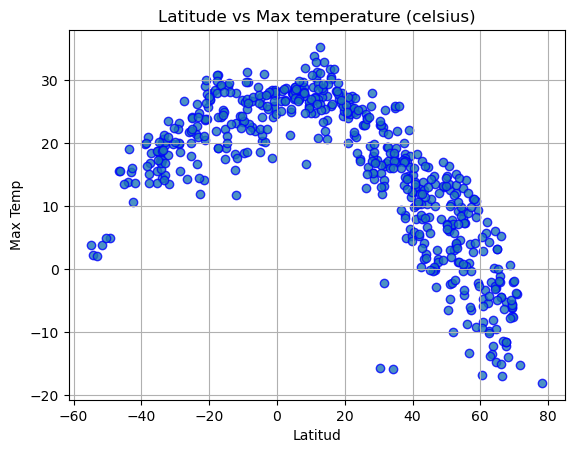

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_maxtemp = city_data_df["Max Temp"]
plt.scatter(x_values, y_maxtemp, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
    #*** This is not working **
plt.grid(True)
plt.title("Latitude vs Max temperature (celsius)")
plt.ylabel("Max Temp")
plt.xlabel("Latitud")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout
plt.show()

#### Latitude Vs. Humidity

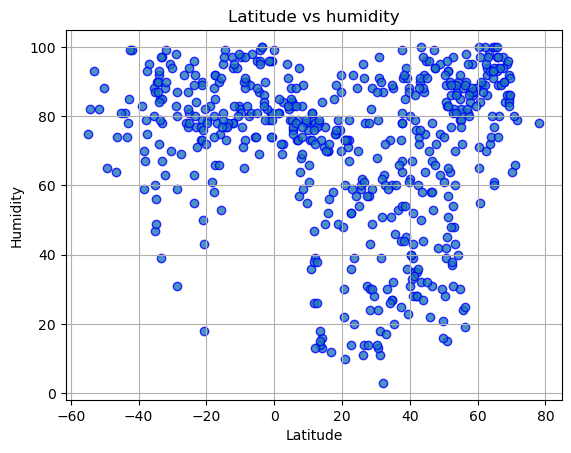

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_humidity = city_data_df["Humidity"]
plt.scatter(x_values, y_humidity, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

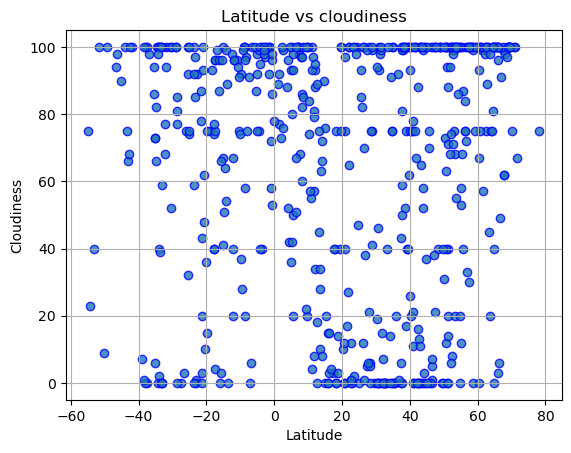

In [21]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
plt.scatter(x_values, y_cloud, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

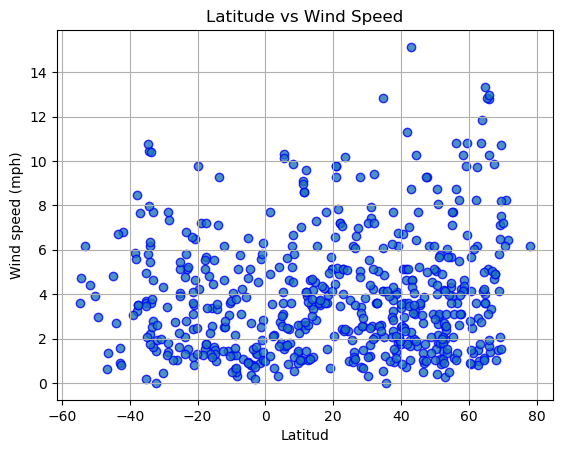

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
plt.scatter(x_values, y_wind, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitud")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE